# 2023F-T3 AISC2007 - Deep Learning

---

### CASE STUDY Week 6 - Predict Covid-19 based on lung X-Rays

---

#### Description
- The professor provided us with a dataset of lung X-rays paired with image masks highlighting the position of the lungs.
- The dataset is organized into three folders:

    **COVID-19**: X-rays classified as suffering from COVID-19.<br>
    **Non-COVID**: X-rays classified with other diseases.<br>
    **Healthy**: X-rays classified as healthy.<br>


#### Author
> Fabio Duarte Junior <br> fabioduartejunior@loyalistcollege.com / fabiojr@skiff.com

#### Objective
> Build a model to predict whether a person has COVID-19, other infections, or no lung infection from the lung X-rays.

#### My Approach
> 1 - Data Preprocessing: Analyzing image histograms and applying image processing techniques using the OpenCV (CV2) library.
>> I experimented with various transformations to enhance the image, ultimately settling on a combination of CLAHE, HE normalization, and sharpening techniques.<br>
>> Subsequently, I cropped the images using the image masks.

> 2 - For modeling, I used a CNN (Convolutional Neural Network) and also attempted to implement a version of the AlexNet CNN as a baseline to compare my model.
>> I used Precision, Recall, and F1-Score as metrics, since it is a medical diagnostic case and it is important to have confidence in both positive and negative results.<br>
>> I am also measuring the AUC-ROC to assess how well my model can differentiate between classes.<br>
>> In addition, I guided my CNN modeling by observing the outputs of the layers.<br>
>> I ran executions with 90 epochs varying the batch size, always using the same for both CNN implementations.

#### Conclusion
>> After several attempts and testing various approaches, I believe I have reached a satisfactory result compared to AlexNet.<br>
>> I achieved a model that has excellent ability to distinguish between classes and a good capacity to identify cases of COVID-19.<br>
>> Compared to the AlexNet-like implementation, the results were very close across all metrics, but a crucial detail in favor of my model is<br>
>> that the epoch processing speed is much lower than that of the AlexNet-like implementation.<br>
>> While each epoch of my CNN model took an average of 20 seconds to run, the AlexNet-like implementation took no less than 60 seconds, showing several spikes.<br>
>> In other words, I achieved a model with very similar metrics, but that consumes far less computational resources and time than an AlexNet-style implementation.

**Example of Metrics Gathered in the Process**

<span style="white-space: nowrap;display: inline;">
<span style="float:left;"> 
    
| Metric           | My Implementation | AlexNet-like Implementation |
|------------------|-------------------|-----------------------------|
| AUC-ROC Micro    | 0.937165          | 0.935511                    |
| AUC-ROC Macro    | 0.938801          | 0.938398                    |
| AUC-ROC Weighted | 0.938728          | 0.938339                    |
    
</span>
    
<span style="float:left;"> 

My CNN| Implementation| _| _ | _
---|---|---|---|---
Class/Metric| precision| recall| f1-score | support
COVID-19|0.861963|0.737533|0.794908|381.000000
Other|0.727941|0.868421|0.792000|342.000000
Healthy|0.822857|0.797784|0.810127|361.000000
Accuracy|0.798893|0.798893|0.798893|0.798893
Macro avg|0.804254|0.801246|0.799012|1084.000000
Weighted avg|0.806656|0.798893|0.799059|1084.000000
</span>
<span style="float:left;display: inline;"> 
  

AlexNet| style|implementation|_ |_    
---|---|---|---|---    
Class/Metric| precision|recall|f1-score|support
COVID-19|0.823529|0.771654|0.796748|381.000000
Other|0.813456|0.777778|0.795217|342.000000
Healthy|0.787500|0.872576|0.827858|361.000000
Accuracy|0.807196|0.807196|0.807196|0.807196
Macro avg|0.808162|0.807336|0.806608|1084.000000
Weighted avg|0.808352|0.807196|0.806625|1084.000000

</span>
</span>



<br>
<h6><small>This work is based on the original study case project created by Group E for the term 3 A.I. students of Loyalist College, in which I had the honor to participate.<br>
It is intended solely for educational purposes.
Please refer to the reference section.<br>
We do not have information about the source of the images, they are provided by the professor in moodle without credits, for that reason I am not making it available, just the code.</small></h6>

<hr>

<h1>Summary</h1>
<hr>

- [01 - Libs and General Parameters](#1)
- [02 - Image Pre-processing for the CNN](#2)
    - [2.1 - Auxiliary functions](#3)
        - [2.1.1 - Loading a sample image for testing](#4)
    - [2.2 - Gaussian Blur](#5)
    - [2.3 - Image Normalization ](#6)
    - [2.4 - CLAHE Normalization](#7)
    - [2.5 - Sharpening Image ](#8)
    - [2.6 - Histogram Equalizatio](#9)
    - [2.7 - What if I combine CLHE and HE + Sharpening ?](#10)
    - [2.8 - Lets crop the image and see the results](#11)
    - [2.9 - Applying the enhancement solution to all the images](#12)
        - [2.9.1 - Functions for processing](#13)
        - [2.9.2 - Enhancing Covid Images](#14)
        - [2.9.3 - Enhancing Images of Other Diseases](#15)
        - [2.9.4 - Enhancing  Images of Healthy lungs](#16)
        - [2.9.5 - Mapping images x labels](#17)
- [03 - Creating Train/Test Folders](#18)
    - [3.1 - Spliting list](#19)
- [04 - CNN Model](#20)
    - [4.1 - Setting train and validation, also image augmentation](#21)
    - [4.2 - My Implementation](#22)
    - [4.3 - Running the baseline model](#23)
    - [4.4 - Evaluating the execution](#24)
    - [4.5 - Ploting the filters for each layer](#25)
- [05 - Implementation based on AlexNet](#26)
    - [5.1 - Ploting metrics](#27)
    - [5.2 - Ploting filters for each layer](#28)
- [References](#29)


# 01 - Libs and General Parameters <a id="1"></a>

In [1]:
import cv2                                            # OpenCV for image processing and computer vision tasks
import os                                             # Provides a way to use operating system dependent functionality like reading or writing to the file system
import numpy as np                                    # NumPy for numerical operations and working with arrays
import pandas as pd                                   # Pandas for data manipulation and analysis, provides data structures like Series and DataFrame
import tensorflow as tf                               # TensorFlow for building and training machine learning models
from tensorflow import keras                          # Keras is TensorFlow's high-level API for building and training deep learning models
import matplotlib.pyplot as plt                       # Matplotlib for creating static, interactive, and animated plots in Python
from tensorflow.keras.models import Model             # Model class from Keras is used to create and train different types of neural network models.
from tensorflow.keras.optimizers import Adam          # Adam optimizer from Keras for training deep learning models
from IPython.display import display, Markdown         # IPython Display for displaying various types of outputs in Jupyter notebooks
from tensorflow.keras.models import Sequential        # Sequential API from Keras for linear stacking of layers
from sklearn.preprocessing import LabelEncoder        # Scikit-Learn's LabelEncoder for converting labels into a format suitable for ML models
from tensorflow.keras.metrics import AUC, Recall      # AUC and Recall metrics from Keras for evaluating ML models
from tensorflow.keras.utils import to_categorical     # Keras utility functions, to_categorical for one-hot encoding
from sklearn.model_selection import StratifiedKFold   # Scikit-Learn's StratifiedKFold for stratified sampling
from sklearn.model_selection import train_test_split  # Scikit-Learn utility function for splitting data into train/test sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Keras ImageDataGenerator for real-time data augmentation
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report  # Scikit-Learn metrics for model evaluation
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization  # Various Keras layers for building neural networks

In [2]:
## Root folders
COVID_FOLDER   = 'Val/COVID-19/'
OTHER_FOLDER   = 'Val/Non-COVID/'
HEALTHY_FOLDER = 'Val/Normal/'

# 02 - Image Pre-processing for the CNN <a id="2"></a>
> Firstly, I used a sample image to explore the best methods for enhancing the image.
> Secondly, the best enhancement strategy was applied to the images, generating a new dataset.
> The new dataset is composed of a folder with the processed images and a CSV file mapping each image with its label.

<hr>

> **Finding the Best Technique to Enhance the Image**
<hr>

> I found this paper using google https://ceur-ws.org/Vol-3171/paper91.pdf where they discuss the best methods<br> for processing X-rays of the lung. However, after testing some of the techniques, my images turned completely black and white or too blurry.<br>
Maybe it's due to differences in the image properties, such as dimension, resolution, etc.<br>
But I have some ideas based on the information in the paper and my previous knowledge in Photoshop (lol).<br>
Let's give it using google 

## 2.1 - Auxiliary functions <a id="3"></a>
I'll start by analysing the histograms and also comparing visually the attempts for enhancing the images.

In [3]:
## For ploting images histogram
def plot_hist(original, enhanced, size=(10,5)):
    
    # Calculate the histogram of the image based on the image size
    hist, bins = np.histogram(original.flatten(), 256, [0, 256])

    # Creating axis for the plot.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=size)

    # Display hist of the original image
    ax1.hist(original.flatten(), 256, [0, 256], color='blue')
    ax1.set_xlim([0, 256])
    ax1.set_title('Histogram - Original Image')

    # Display hist of the Enhanced Image
    ax2.hist(enhanced.flatten(), 256, [0, 256], color='blue')
    ax2.set_xlim([0, 256])
    ax2.set_title('Histogram - Enhanced Image')
    plt.show()
    
    
## For plotting images side by side
def plot_images(original, enhanced, size=(10,5)):
    
    # Creating axis for the plot.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=size)

    # Display hist of the original image
    ax1.imshow(original,cmap='gray')
    ax1.set_xlim([0, 256])
    ax1.set_title('Original')
    ax1.axis('off') # hide axis
    
    # Display hist of the Enhanced Image
    ax2.imshow(enhanced,cmap='gray')
    ax2.set_xlim([0, 256])
    ax2.set_title('Enhanced')
    ax2.axis('off') # hide axis
    
    plt.show()    

#### 2.1.1 - Loading a sample image for testing <a id="4"></a>

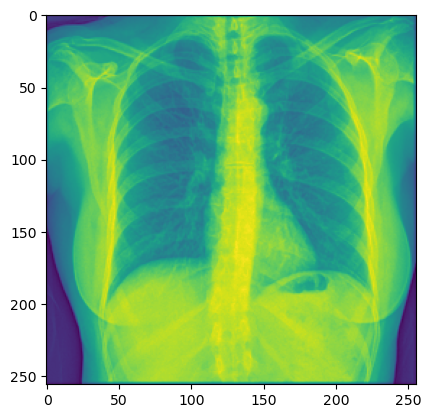

In [4]:
sample=cv2.imread('test_1021.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(sample)

## 2.2 - Gaussian Blur <a id="5"></a>
Besides the sources that I researched are saying that Gaussian blur is good for using together with normalization, I personally think that, for this case, it will lead to a loss of important details of the bronchi and bronchioles, which are kind of hard to identify visually.
Even skeptical, let's try it.

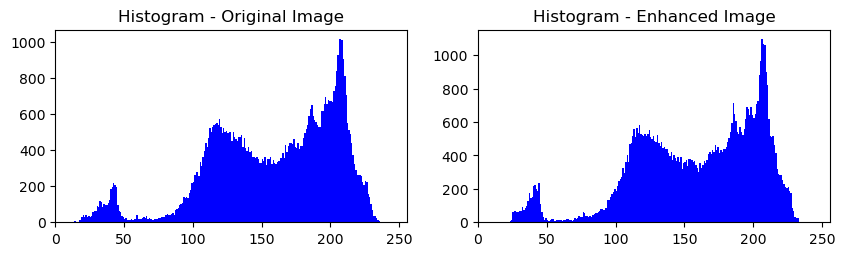

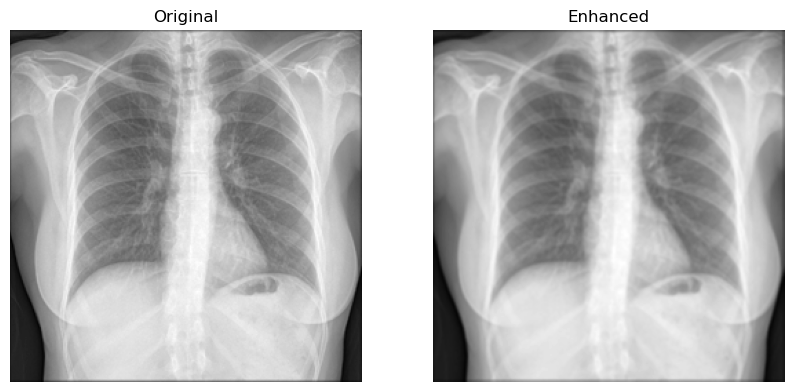

In [5]:
blurred_image = cv2.GaussianBlur(sample, (3, 3), 0)

plot_hist(sample, blurred_image,size=(10,2.5))
plot_images(sample, blurred_image,size=(10,10))

In conclusion, after trying some variations of kernels, I still think that Gaussian blur removes important data. If the kernel is too low, it has no effect on the distribution, but with a kernel with "high" values to make a difference, it becomes really blurry (in my opinion), and I failed to find an optimal point. I'll look for alternatives.


## 2.3 - Image Normalization <a id="6"></a>
> Let's try with and without the blur.
While trying to adjust the thresholds, I noticed they work better with the raw images than the cropped (after applying the mask) ones.<br>
So, I am working with the raw image, and I'll crop it at the end of the process.


<hr> <b>Normalization:</b> <hr>

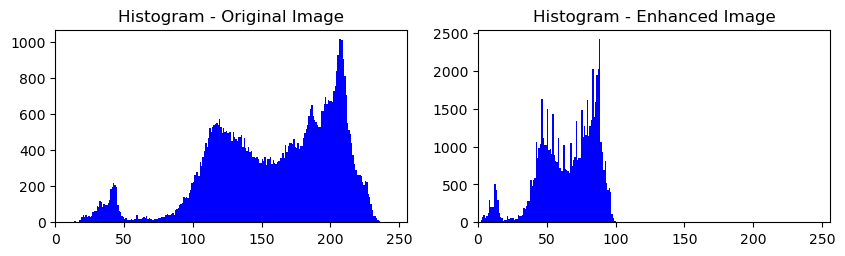

<hr> <b>Blur + Normalization</b> <hr>

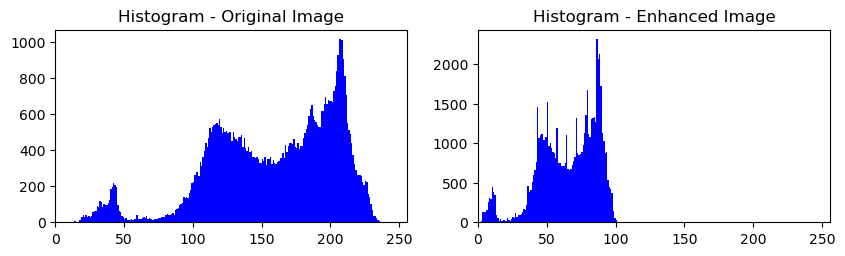

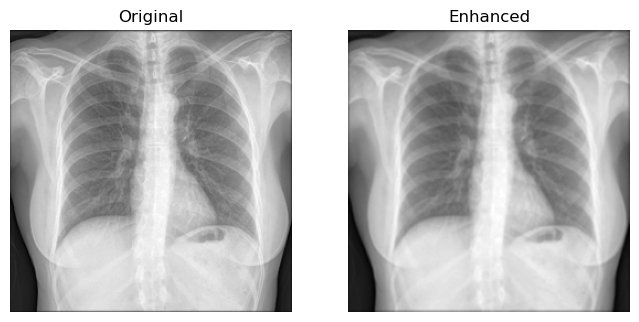

In [6]:
## Define the New Range of Intensity Values
# Those seem to be the optimal values
new_min = 0
new_max = 100

normalized_image = cv2.normalize(sample, None, new_min, new_max, cv2.NORM_MINMAX)
display(Markdown("<hr> <b>Normalization:</b> <hr>"))
plot_hist(sample, normalized_image,size=(10,2.5))

normalized_image = cv2.normalize(blurred_image, None, new_min, new_max, cv2.NORM_MINMAX)
display(Markdown("<hr> <b>Blur + Normalization</b> <hr>"))
plot_hist(sample, normalized_image,size=(10,2.5))


plot_images(sample,normalized_image,size=(8,8))

Not the result I was expecting. We got some improvement, but I still don't think it's enough. By the way, it could be different after I crop the background using the mask.


## 2.4 - CLAHE Normalization <a id="7"></a>
> Look what I found! [https://en.wikipedia.org/wiki/Adaptive_histogram_equalization](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization) <br>
> I also discovered that OpenCV has an implementation of it called Contrast Limited.<br> Let's see what it can do =]


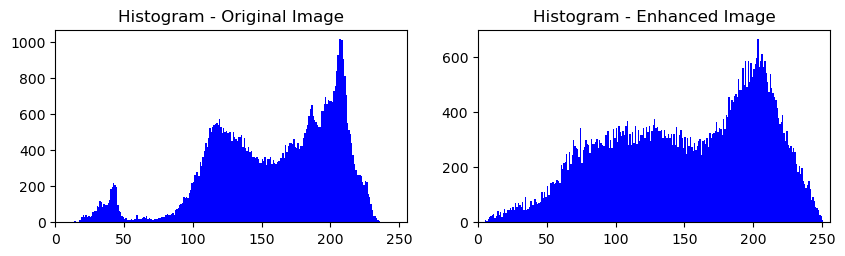

In [7]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(sample)

plot_hist(sample, clahe_image,size=(10,2.5))

Wayy better, lets take a look at the images!

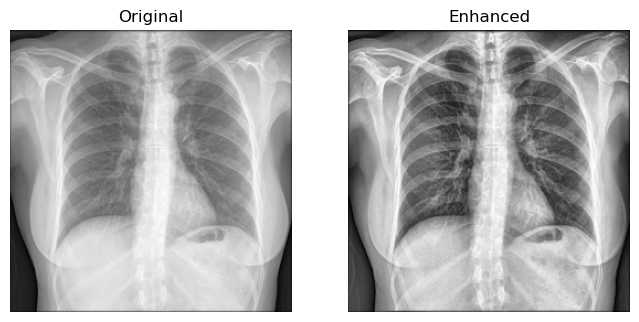

In [8]:
plot_images(sample, clahe_image,size=(8,8))

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## 2.5 - Sharpening Image <a id="8"></a>
> I was wondering if it could be better than this, so I tried other techniques like scaling, but they had not much effect on the CLAHE-processed image.<br>
> So, I remembered Photoshop filters where you can enhance the borders, Sharpening mask filter. With the help of Chat-GPT, I found a kernel for applying the sharpening. After some tries, I think I got an optimal kernel for sharpening. Let's check the results:


<hr> <b>CLAHE Normalized vs CLAHE + Sharpened </br><hr>

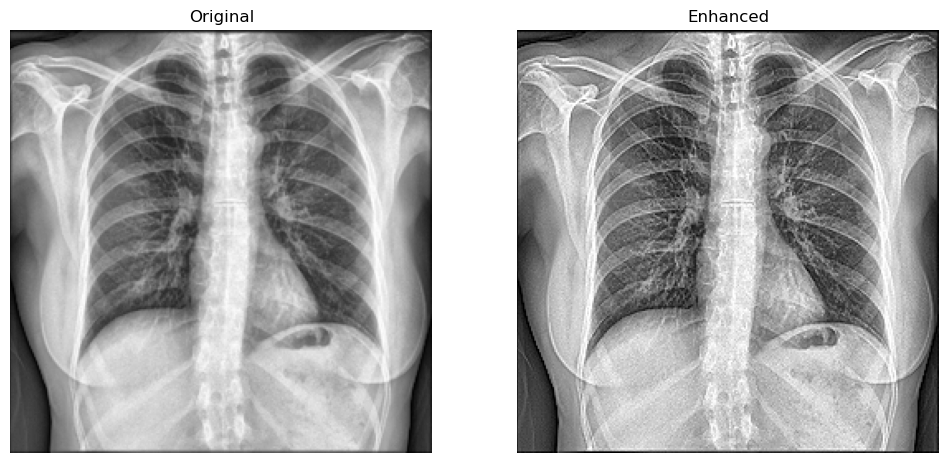

In [9]:
# Kernel for shapening
kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]])

# Applying to the image
sharpened = cv2.filter2D(clahe_image, -1, kernel)

display(Markdown("<hr> <b>CLAHE Normalized vs CLAHE + Sharpened </br><hr>"))
plot_images(clahe_image,sharpened, size=(12,12))

Oh boy! So proud of this image! Lets check the histogram:

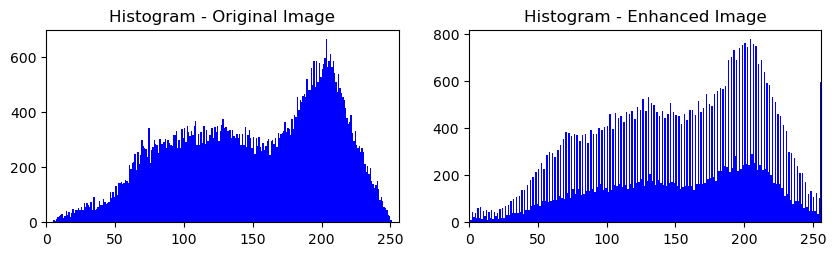

In [10]:
plot_hist(clahe_image, sharpened,size=(10,2.5))

Weird, there are still a lot of "mini peaks," but visually, it's way, way better.
> Do we have our champion?


## 2.6 - Histogram Equalization <a id="9"></a>
I was wondering if other methods could be equally effective.<br>
I found Histogram Equalization. It is supposed to adjust the spread of the histogram, intensity values, and contrast.<br>
Let's try it.


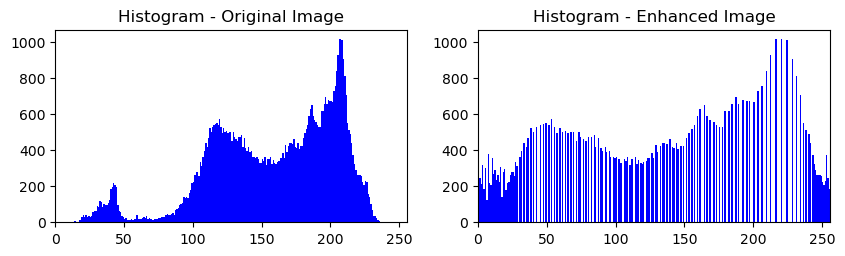

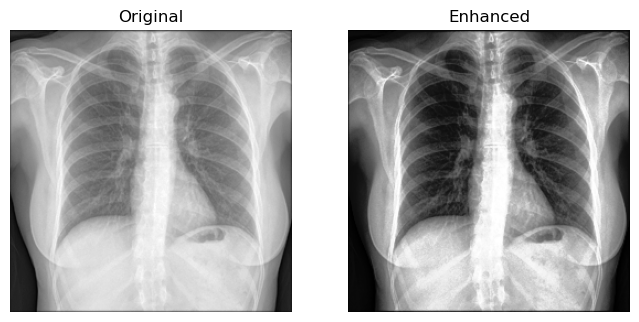

In [11]:
eq_hist = cv2.equalizeHist(sample)

plot_hist(sample, eq_hist,size=(10,2.5))
plot_images(sample, eq_hist,size=(8,8))

Indeed, interesting. Let's apply the sharpening mask and see what happens.


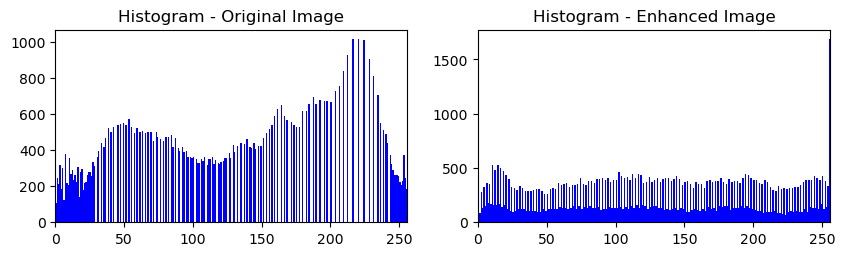

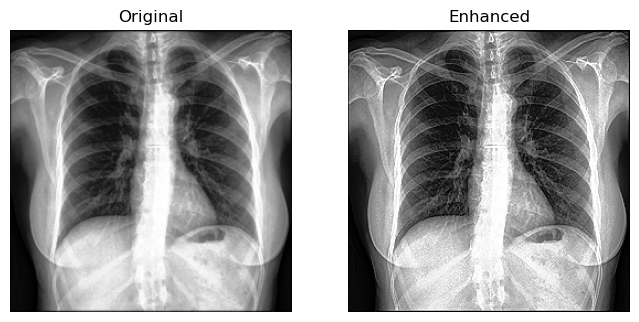

In [12]:
sharpened = cv2.filter2D(cv2.equalizeHist(eq_hist), -1, kernel)
plot_hist(eq_hist, sharpened,size=(10,2.5))
plot_images(eq_hist, sharpened,size=(8,8))

Sooo niceeee!

## 2.7 - What if I combine CLHE and HE + Sharpening ? <a id="10"></a>
Just an Idea. 

<hr> <b>HE + Sharpenning   vs  HE+ CLAHE+ Sharpenning </br><hr>

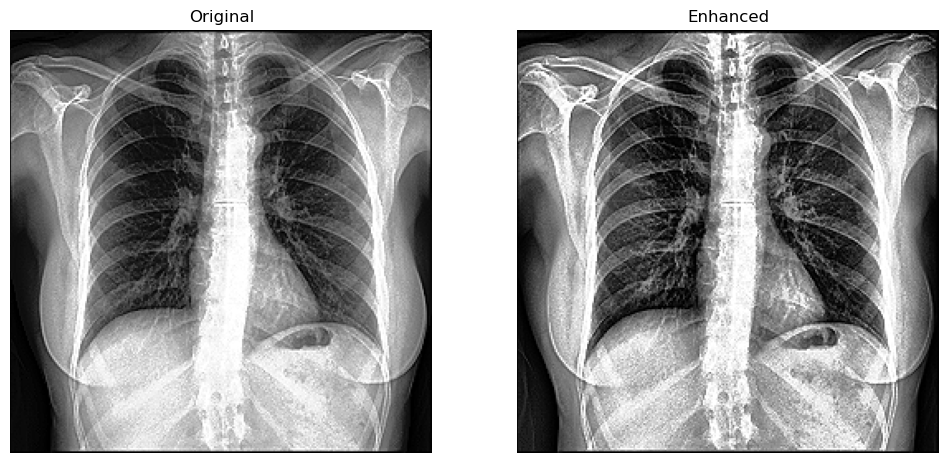

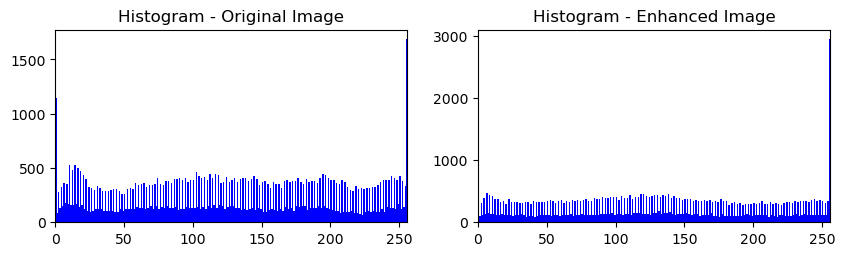

In [13]:
clahe_he = cv2.equalizeHist(clahe_image)
sh1 = cv2.filter2D(cv2.equalizeHist(eq_hist), -1, kernel)
sh2 = cv2.filter2D(cv2.equalizeHist(clahe_he), -1, kernel)

display(Markdown("<hr> <b>HE + Sharpenning   vs  HE+ CLAHE+ Sharpenning </br><hr>"))
plot_images(sh1,sh2, size=(12,12))
plot_hist( sh1,sh2,size=(10,2.5))


I think we've reached the optimal point here. The image looks clear and detailed. <br>
It becomes even clearer when comparing it with the original image. We can even notice some details in the bones now.


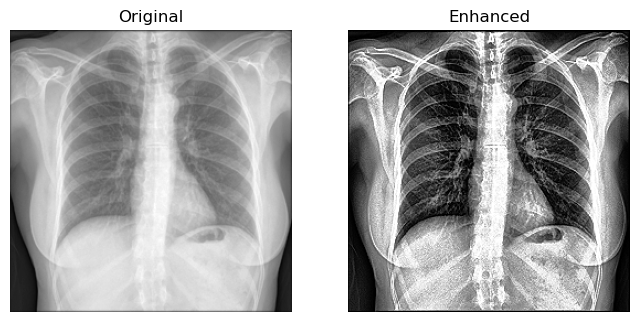

In [14]:
plot_images(sample,sh2, size=(8,8))

## 2.8 - Lets crop the image and see the results <a id="11"></a>

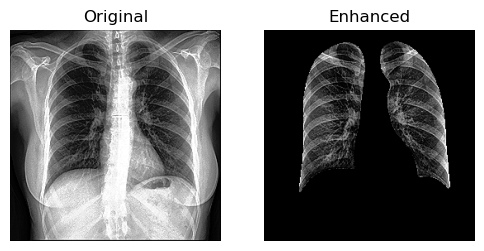

In [15]:
## Reading the mask file
mask = cv2.imread("mask_1021.png", cv2.IMREAD_GRAYSCALE)

# Apply the mask to the image
masked_img = cv2.bitwise_and(sh2, sh2, mask=mask)

plot_images(sharpened, masked_img,size=(6,6))

Cool. <br>
I realized now that the mask is cropping the heart area and also some part of the left lung. Maybe our model would fail to recognize when the problem is located in this area. Should we use both the original and cropped versions?


**Checking the Histogram**

For scaling purposes, I had to let the bin calculation for the plt. The second one looks out of scale using my function because of the discrepancy caused by the high frequency of the black background.


<function matplotlib.pyplot.show(close=None, block=None)>

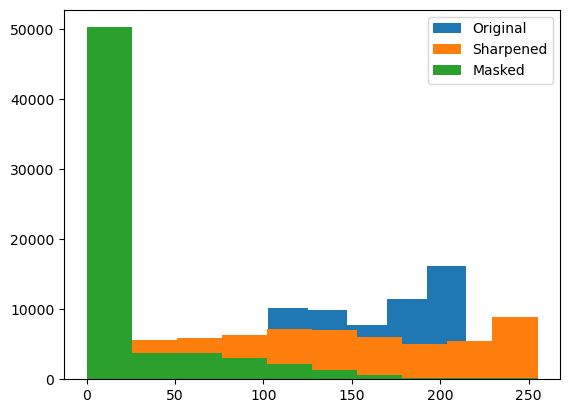

In [16]:
## Ploting the sharpened version vs mask croped version
plt.hist(sample.flatten(),label="Original")
plt.hist(sh2.flatten(),label="Sharpened")
plt.hist(masked_img.flatten(),label="Masked")
plt.legend(loc='best')
plt.show

It seems like the masking removed that "weird" peakiness from the image. The first bin has a high frequency <br> due to the black background.<br>
Job done.


## 2.9 - Applying the enhancement solution to all the images<a id="12"></a>

### 2.9.1 - Functions for processing <a id="13"></a>

In [17]:
## Keeping the file name and the class label in lists
file_names   = list()
class_labels = list()

## This function has the following intent:
#  1 - Store the file names associated with the labels
#  2 - Enhance all the images by applying the tecniques found useful in the exploration
#  3 - Store the new images into a single folder

def enhance_images(root_folder,label):
    folder        = root_folder + 'images'
    mask_folder   = root_folder + 'lung masks'
    output_folder = 'processed_v3'
    
    ## Get the list of 
    img_files = os.listdir(folder)
    print("Number of files in the folder", len(img_files))
    
    ## Read all the images in the folder
    for image_name in img_files:

        ## Load the image
        path = os.path.join(folder, image_name)
        img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        ## Read the mask 
        mask_path = os.path.join(mask_folder, image_name)
        mask      = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        ## CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(img)
        
        ## Sharpening
        kernel = np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]])
        sharpened = cv2.filter2D(clahe_image, -1, kernel)
        
        ## HE
        he_image = cv2.equalizeHist(img)
        
        ## Sharpening
        sharpened = cv2.filter2D(he_image, -1, kernel)
        
        
        ## HE + CLHE + Sharpening
        he_cl = cv2.equalizeHist(clahe_image)
        
        ## Sharpening
        sharpened = cv2.filter2D(he_cl, -1, kernel)
                      
        ## Mask Cropping
        masked_img = cv2.bitwise_and(sharpened, sharpened, mask=mask)
        
        ### Resize the image to 224x224, as this is a common approach when working with CNNs,
        ## and I am willing to try an AlexNet implementation.
        masked_img = cv2.resize(masked_img, (224, 224))
        
        ### Save - Mask cropped 
        output_path = os.path.join(output_folder, "masked_" + image_name)
        cv2.imwrite(output_path, masked_img)  
        
        ## Gathering file name and label
        file_names.append("masked_" + image_name)
        class_labels.append(label)

### 2.9.2 - Enhancing Covid Images <a id="14"></a>

In [18]:
%%time
enhance_images(COVID_FOLDER ,"covid")

Number of files in the folder 1903
CPU times: user 3.35 s, sys: 964 ms, total: 4.31 s
Wall time: 4.79 s


### 2.9.3 - Enhancing Images of Other Diseases <a id="15"></a>

In [19]:
%%time
enhance_images(OTHER_FOLDER ,"other")

Number of files in the folder 1802
CPU times: user 2.78 s, sys: 906 ms, total: 3.68 s
Wall time: 4.59 s


### 2.9.4 - Enhancing  Images of Healthy lungs <a id="16"></a>

In [20]:
%%time
enhance_images(HEALTHY_FOLDER,"healthy")

Number of files in the folder 1712
CPU times: user 2.73 s, sys: 920 ms, total: 3.65 s
Wall time: 4.37 s


### 2.9.5 - Mapping images x labels <a id="17"></a>

In [21]:
## Creating a pandas dataframe to keep the mapping between images and labels
mapping = pd.DataFrame()
mapping["file"]  = file_names 
mapping["label"] = class_labels  

## Checkpoint
mapping.to_csv("image_mapping_v3.csv", index=False)
print("Total images: ", mapping.shape[0])
mapping.head(1)

Total images:  5417


file  label
0  masked_covid_1336.png  covid

# 03 - Creating Train/Test Folders <a id="18"></a>

### 3.1 - Spliting list <a id="19"></a>
I got this idea for spliting, I will use the dataframe with the mapped filenames and use it as base for train/test split<br>
and then I will use the lists as base to move the files to train/test directory.

In [22]:
## Split the file using the label to keep a stratified version for the samples and getting items at random.
# Getting 80% of the files at random for train and 20% for validation

train_df, val_df = train_test_split(mapping, test_size=0.2, stratify=mapping['label'], random_state=42)
print("Train set size: ", train_df.shape[0], "Validation set size: ",val_df.shape[0])

Train set size:  4333 Validation set size:  1084


# 04 - CNN Model <a id="20"></a>

### 4.1 - Setting train and validation, also image augmentation <a id="21"></a>

> Some "global" variables

In [40]:
## Path for the train and validation datasets
train_dir      = "processed_v3/" 
validation_dir = "processed_v3/" 

## parameters for the model
img_width, img_height = 224, 224
num_classes = 3
batch_size  = 50

>Creating an ImageDataGenerator object for image augmentation. <br>
>It is supposed to generate variations of the images during runtime execution.


In [78]:
## Those parameters will generate variations of the image in run time.
train_datagen = ImageDataGenerator(
    rescale=1.0 / 224.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.1, 1.5],
    fill_mode='nearest'
)

## Do not apply transformation to the validation dataset besides the scale adjustment.
validation_datagen = ImageDataGenerator(rescale=1.0 / 224.0)

> Using the `flow` object to load the image files according to my mapping dataset.
> It also applies encoding to my label list, so I do not need to do it manually.


In [79]:
# Dataflow to open images according to the content of my dataframe. 
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,        # my datagrame 
    directory=train_dir,       # my image folder
    x_col="file",              # my "x" column
    y_col="label",             # Target column with the labels 
    target_size=(img_width, img_height),
    batch_size=batch_size,     # Batch size (is being set in the begining of this section       
    class_mode='categorical',   # Yeap, it is categorical data
    color_mode='grayscale'    # Set my images to gray scale
)

# Same things but now for the validation images.
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=validation_dir,
    x_col="file",
    y_col="label",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 4333 validated image filenames belonging to 3 classes.
Found 1084 validated image filenames belonging to 3 classes.


### 4.2 - My Implementation <a id="22"></a>
This implementation was generated after several trials, refining the parameters, restructuring the layers, and analyzing the metrics and steps generated in the layers.


###### Auxiliar functions for metric evaluation

In [104]:
## Function for drawing the graphs for the metrics
def plot_metrics(metrics):
    # Extracting the metrics from the object
    loss         = metrics.history['loss']
    val_loss     = metrics.history['val_loss']
    accuracy     = metrics.history['accuracy']
    recall       = metrics.history['Recall']
    val_recall   = metrics.history['val_Recall']
    val_auc      = metrics.history['val_auc']
    val_accuracy = metrics.history['val_accuracy']
    auc          = metrics.history['auc']
    val_auc      = metrics.history['val_auc']
    
    # Set X axis range according to the number of epochs
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(2, 2, 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(epochs, accuracy,  label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.title('Accuracy')

    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(epochs, auc,  label='Training AUC')
    plt.plot(epochs, val_auc,  label='Validation AUC')
    plt.title('AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.autoscale()
    
    plt.subplot(2, 2, 4)
    plt.plot(epochs, recall,  label='Recall')
    plt.plot(epochs, val_recall,  label='Validation Recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.autoscale()    
    plt.show()

def evaluate_model(model, validation_generator):
    # Obtain true labels and predicted probabilities
    y_true = []
    y_pred = []
    for i in range(len(validation_generator)):
        x, y = validation_generator[i]
        y_true.append(y)
        y_pred.append(model.predict(x, verbose=0))

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    # If true labels are not in one-hot format, convert them
    if y_true.shape[-1] == 1:
        y_true = to_categorical(y_true)

    # Convert true and predicted labels to class labels
    y_true_class   = np.argmax(y_true, axis=1)
    y_pred_class   = np.argmax(y_pred, axis=1)

    # Calculate the confusion matrix
    conf_matrix    = confusion_matrix(y_true_class, y_pred_class)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['COVID-19', 'Other', 'Healthy'], columns=['COVID-19', 'Other', 'Healthy'])

    # Function to apply styling
    def highlight_diagonal(data, color='cyan'):
        attr = f'background-color: {color}'
        is_diagonal = pd.DataFrame(np.eye(data.shape[0]), index=data.index, columns=data.columns).astype(bool)
        return pd.DataFrame(np.where(is_diagonal, attr, ''), index=data.index, columns=data.columns)

    # Apply styling and display the DataFrame
    styled_df = conf_matrix_df.style.apply(highlight_diagonal, axis=None)
    display(Markdown("## Confusion Matrix"))
    display(styled_df)
    
    # Calculate and print the classification report, including F1-Score
    class_report = classification_report(y_true_class, y_pred_class, output_dict=True)
    df = pd.DataFrame(class_report).transpose()
    df.index = ['COVID-19', 'Other', 'Healthy', 'Accuracy', 'Macro avg', 'Weighted avg']
    display(Markdown("## Classification Report"))
    display(df)
    
    # Display AUC-ROC
    display(Markdown("## AUC-ROC"))
    roc_auc_micro = roc_auc_score(y_true, y_pred, average='micro')
    roc_auc_macro = roc_auc_score(y_true, y_pred, average='macro')
    roc_auc_weighted = roc_auc_score(y_true, y_pred, average='weighted')
    
    auc_data = {"Value": [roc_auc_micro, roc_auc_macro, roc_auc_weighted]}
    auc_df = pd.DataFrame(auc_data, index=["AUC-ROC Micro", "AUC-ROC Macro", "AUC-ROC Weighted"])
    display(auc_df)

## This function plots the activation maps of the specified layer displaying n filters based on an image
## that was used during training.
def plot_activation_maps(model, image_path, layer_name, num_filters=4):
    # Load a sample image
    img = plt.imread(image_path)
    img = np.expand_dims(img, axis=0)

    # Create an intermediate model that produces the outputs of the layer of interest
    intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    # Get the activations of that layer for the sample image
    activations = intermediate_model.predict(img)

    # Visualize the activation maps for the first "num_filters" filters
    
    plt.figure(figsize=(24, 12))
    num_available_filters = activations.shape[-1]

    for i in range(num_filters):
        if i < num_available_filters:
            plt.subplot(1, num_filters, i + 1)
            plt.imshow(activations[0, :, :, i], cmap='gray')
            plt.title(f'Filter {i + 1}')
            plt.axis('off')
        else:
            break

    plt.show()

## This function plots the filters of the CNN layers up to the flattening layer.
def plot_layers(model):
    for layer in model.layers:
        if layer.name[:7] == "flatten":
            break
        print(layer.name)
        plot_activation_maps(model, 'processed_v3/masked_covid_1021.png', layer.name, num_filters=20)
        

##### Model

In [105]:
## Creates a sequenntial model 
model = keras.Sequential()

## Convolution
## First convolution  using Relu as activation function.
model.add(Conv2D(10, (11, 11), activation='tanh', input_shape=(img_width, img_height, 1))),
model.add(MaxPooling2D(2, 2)),
model.add(BatchNormalization())

## Second convolution
model.add(Conv2D(20, (3, 3), activation='relu')),
model.add(MaxPooling2D(2, 2)),

## Third convolution
model.add(Conv2D(40, (3, 3), activation='tanh')),
model.add(MaxPooling2D(2, 2)),

## Fourth convolution
model.add(Conv2D(80, (3, 3), activation='relu')),
model.add(MaxPooling2D(2, 2)),

## Third convolution
model.add(Conv2D(160, (3, 3), activation='tanh')),
model.add(MaxPooling2D(2, 2)),

## Fourth convolution
model.add(Conv2D(320, (3, 3), activation='relu')),
#model.add(MaxPooling2D(1, 1)),

## Flattening results
model.add(Flatten()),

## DNN
## Layer 1
model.add(Dense(120, activation='tanh')),

## Layer 2 using he normalization
model.add(Dense(128, activation='relu', kernel_initializer='he_normal')),

## Layer 1
model.add(Dense(64, activation='tanh')),

## Output layer using softmax for optimized
model.add(Dense(num_classes, activation='softmax'))

### 4.3 - Running the baseline model <a id="23"></a>

##### **Unhide to see the epochs**

In [97]:
%%time
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Recall(name='Recall'), AUC(name='auc')])

# Train the model
metrics = model.fit(train_generator, epochs=90, validation_data=validation_generator)

Epoch 1/90
87/87 [==============================] - 21s 241ms/step - loss: 0.5405 - accuracy: 0.7745 - Recall: 0.7489 - auc: 0.9204 - val_loss: 0.4932 - val_accuracy: 0.7934 - val_Recall: 0.7814 - val_auc: 0.9343
Epoch 2/90
87/87 [==============================] - 19s 216ms/step - loss: 0.5035 - accuracy: 0.7967 - Recall: 0.7697 - auc: 0.9312 - val_loss: 0.5527 - val_accuracy: 0.7934 - val_Recall: 0.7869 - val_auc: 0.9227
Epoch 3/90
87/87 [==============================] - 19s 214ms/step - loss: 0.5476 - accuracy: 0.7778 - Recall: 0.7501 - auc: 0.9188 - val_loss: 0.4936 - val_accuracy: 0.8137 - val_Recall: 0.7758 - val_auc: 0.9361
Epoch 4/90
87/87 [==============================] - 19s 213ms/step - loss: 0.5162 - accuracy: 0.7796 - Recall: 0.7464 - auc: 0.9273 - val_loss: 0.5177 - val_accuracy: 0.7943 - val_Recall: 0.7804 - val_auc: 0.9303
Epoch 5/90
87/87 [==============================] - 19s 213ms/step - loss: 0.5075 - accuracy: 0.7863 - Recall: 0.7632 - auc: 0.9296 - val_loss: 0.57

### 4.4 - Evaluating the execution <a id="24"></a>

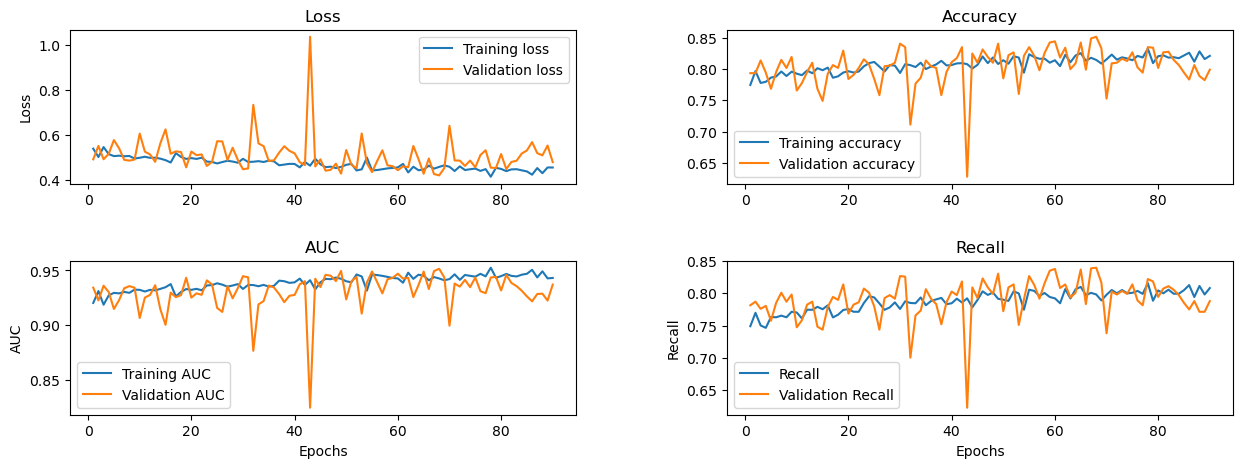

## Confusion Matrix

## Classification Report

precision    recall  f1-score      support
COVID-19       0.861963  0.737533  0.794908   381.000000
Other          0.727941  0.868421  0.792000   342.000000
Healthy        0.822857  0.797784  0.810127   361.000000
Accuracy       0.798893  0.798893  0.798893     0.798893
Macro avg      0.804254  0.801246  0.799012  1084.000000
Weighted avg   0.806656  0.798893  0.799059  1084.000000

## AUC-ROC

Value
AUC-ROC Micro     0.937165
AUC-ROC Macro     0.938801
AUC-ROC Weighted  0.938728

In [98]:
plot_metrics(metrics)
evaluate_model(model, validation_generator)

### 4.5 - Ploting the filters for each layer <a id="25"></a>

conv2d_113
1/1 [==============================] - 0s 18ms/step


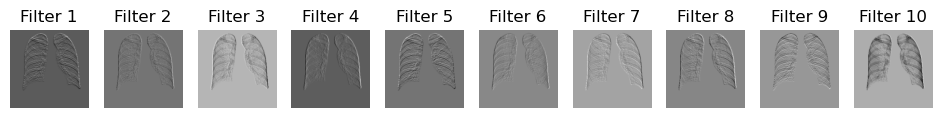

max_pooling2d_93
1/1 [==============================] - 0s 21ms/step


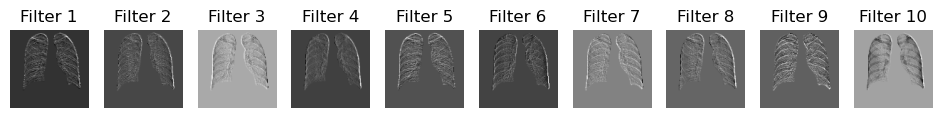

batch_normalization_25
1/1 [==============================] - 0s 24ms/step


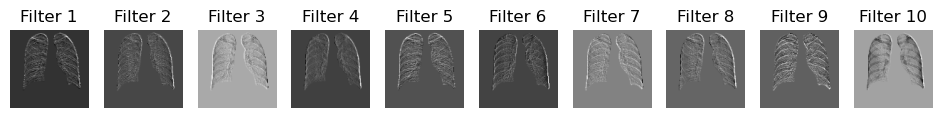

conv2d_114
1/1 [==============================] - 0s 27ms/step


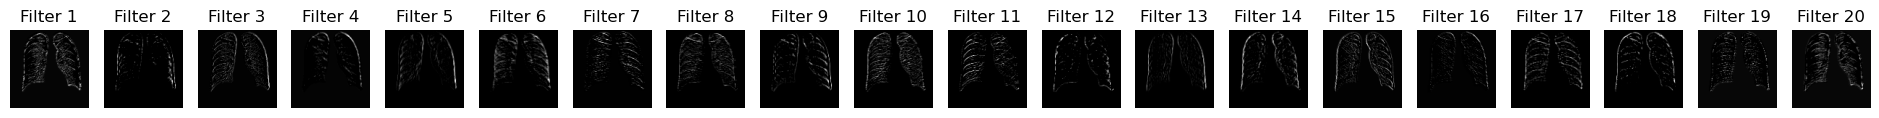

max_pooling2d_94
1/1 [==============================] - 0s 28ms/step


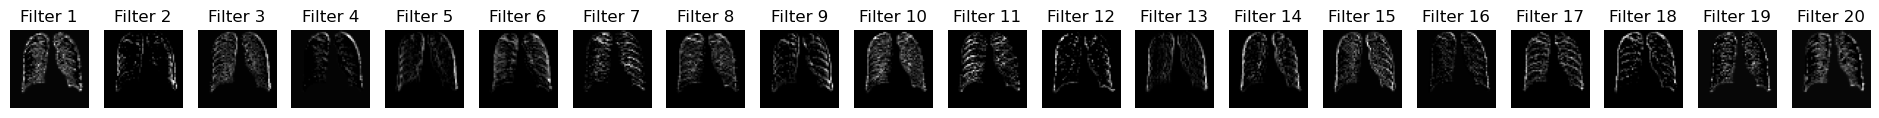

conv2d_115
1/1 [==============================] - 0s 33ms/step


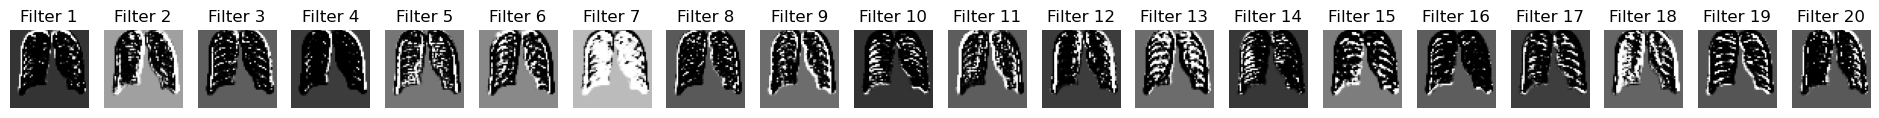

max_pooling2d_95
1/1 [==============================] - 0s 31ms/step


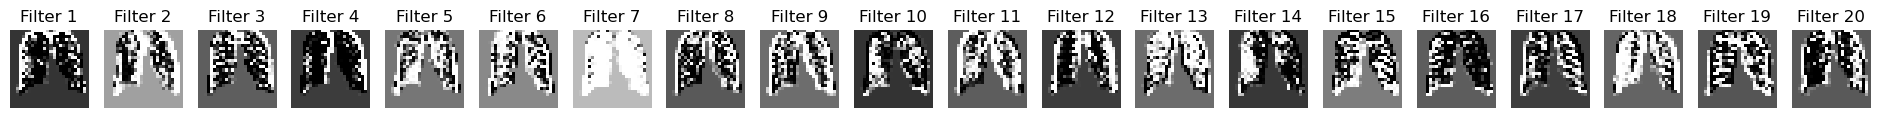

conv2d_116
1/1 [==============================] - 0s 33ms/step


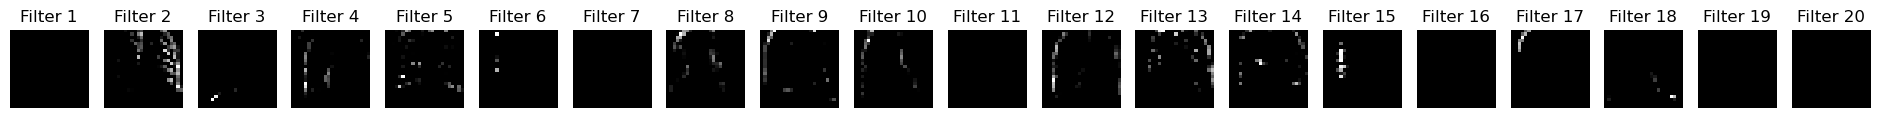

max_pooling2d_96
1/1 [==============================] - 0s 35ms/step


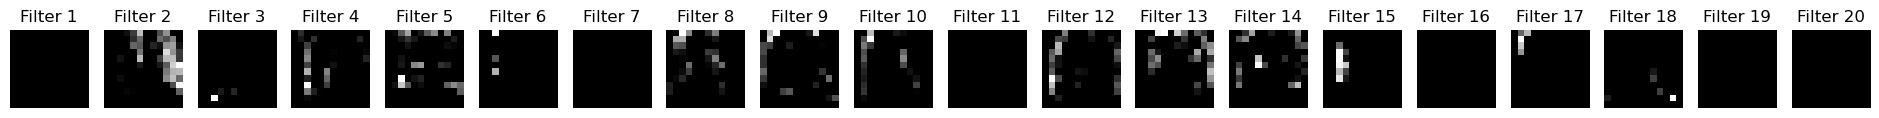

conv2d_117
1/1 [==============================] - 0s 38ms/step


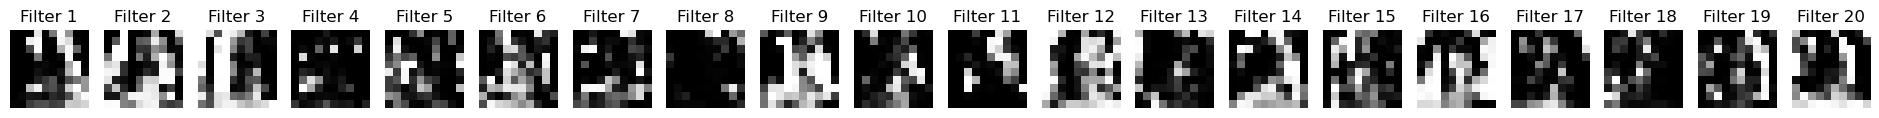

max_pooling2d_97
1/1 [==============================] - 0s 39ms/step


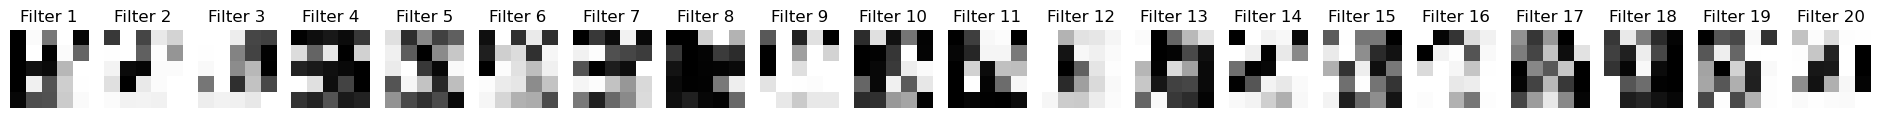

conv2d_118
1/1 [==============================] - 0s 40ms/step


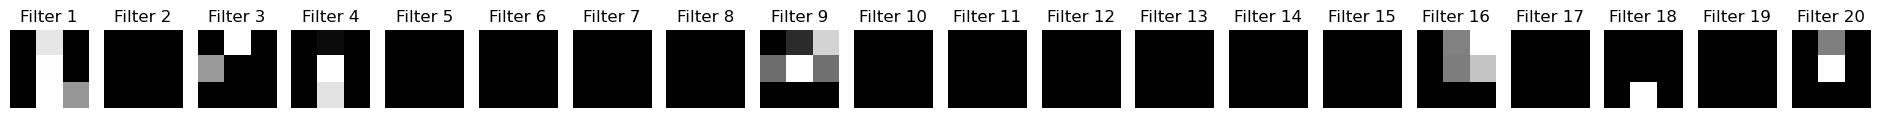

In [99]:
plot_layers(model)

## 05 - Implementation based on AlexNet <a id="26"></a>

In [100]:
## Creates a sequenntial model 
model = keras.Sequential()


# Convolution 1
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=(img_width,img_height,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Convolution 2
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Convolution 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolution 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# DNN
model.add(Flatten())
model.add(Dense(4096, input_shape=(img_width*img_height*1,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())

# Output layer
model.add(Dense(3)) 
model.add(Activation('softmax'))


##### Unhide to see the epochs

In [101]:
%%time
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Recall(name='Recall'), AUC(name='auc')])

# Train the model
metrics = model.fit(train_generator, epochs=90, validation_data=validation_generator)

Epoch 1/90
87/87 [==============================] - 77s 881ms/step - loss: 1.5551 - accuracy: 0.3630 - Recall: 0.2998 - auc: 0.5424 - val_loss: 4.0444 - val_accuracy: 0.3275 - val_Recall: 0.3137 - val_auc: 0.4701
Epoch 2/90
87/87 [==============================] - 74s 854ms/step - loss: 1.2120 - accuracy: 0.4399 - Recall: 0.3397 - auc: 0.6222 - val_loss: 5.6672 - val_accuracy: 0.3155 - val_Recall: 0.3155 - val_auc: 0.4843
Epoch 3/90
87/87 [==============================] - 69s 796ms/step - loss: 1.1300 - accuracy: 0.4692 - Recall: 0.3478 - auc: 0.6551 - val_loss: 5.0986 - val_accuracy: 0.3155 - val_Recall: 0.3155 - val_auc: 0.4895
Epoch 4/90
87/87 [==============================] - 70s 806ms/step - loss: 1.0554 - accuracy: 0.4657 - Recall: 0.3289 - auc: 0.6800 - val_loss: 2.1300 - val_accuracy: 0.3146 - val_Recall: 0.3146 - val_auc: 0.5385
Epoch 5/90
87/87 [==============================] - 73s 834ms/step - loss: 0.9857 - accuracy: 0.5207 - Recall: 0.3610 - auc: 0.7174 - val_loss: 2.08

### 5.1 - Ploting metrics <a id="27"></a>

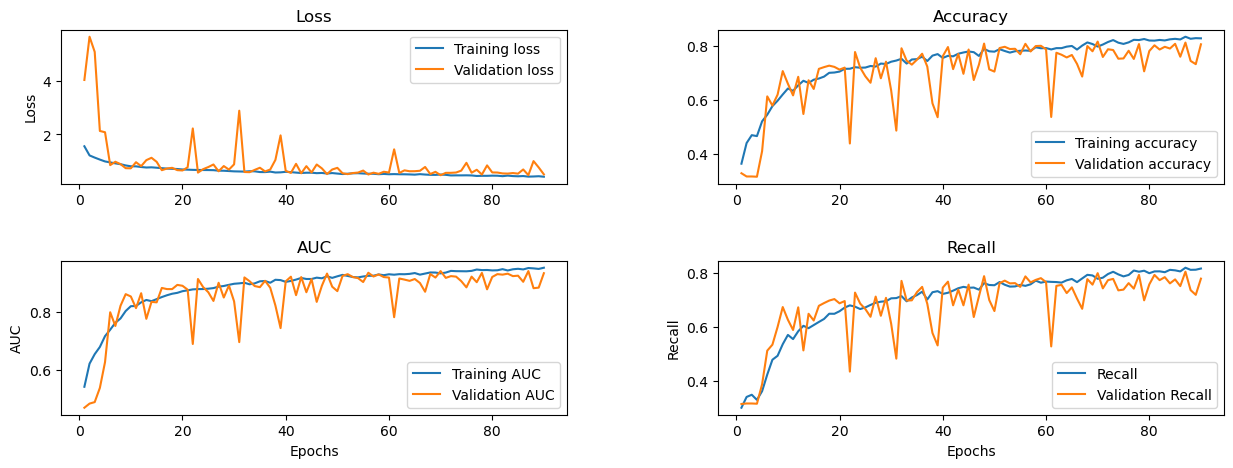

## Confusion Matrix

## Classification Report

precision    recall  f1-score      support
COVID-19       0.823529  0.771654  0.796748   381.000000
Other          0.813456  0.777778  0.795217   342.000000
Healthy        0.787500  0.872576  0.827858   361.000000
Accuracy       0.807196  0.807196  0.807196     0.807196
Macro avg      0.808162  0.807336  0.806608  1084.000000
Weighted avg   0.808352  0.807196  0.806625  1084.000000

## AUC-ROC

Value
AUC-ROC Micro     0.935511
AUC-ROC Macro     0.938398
AUC-ROC Weighted  0.938339

In [102]:
plot_metrics(metrics)
evaluate_model(model, validation_generator)

## 5.2 - Ploting filters for each layer <a id="28"></a>

conv2d_119
1/1 [==============================] - 0s 16ms/step


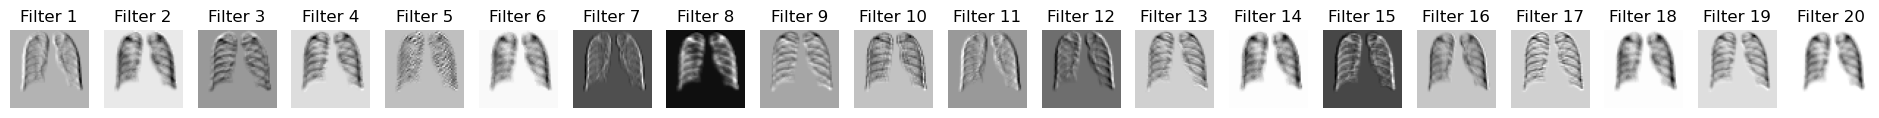

activation_9
1/1 [==============================] - 0s 20ms/step


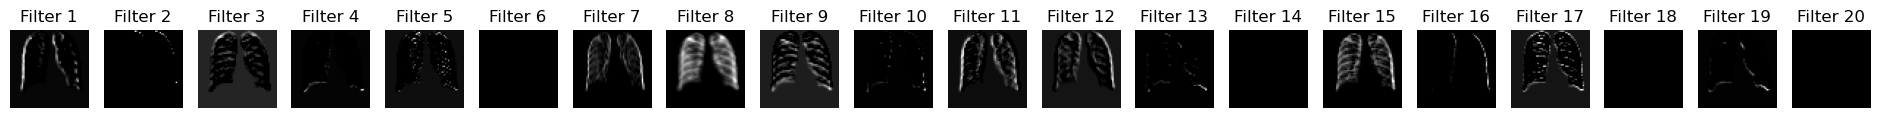

max_pooling2d_98
1/1 [==============================] - 0s 20ms/step


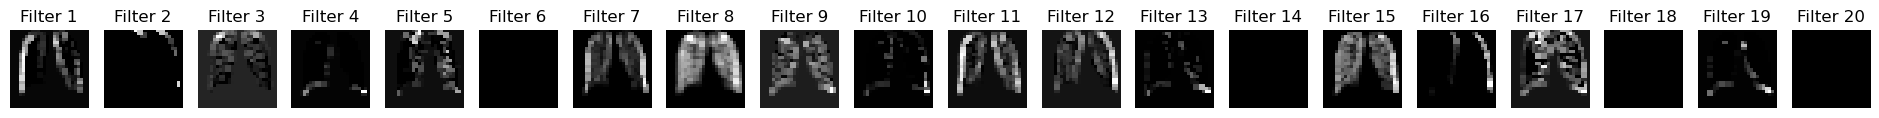

batch_normalization_26
1/1 [==============================] - 0s 25ms/step


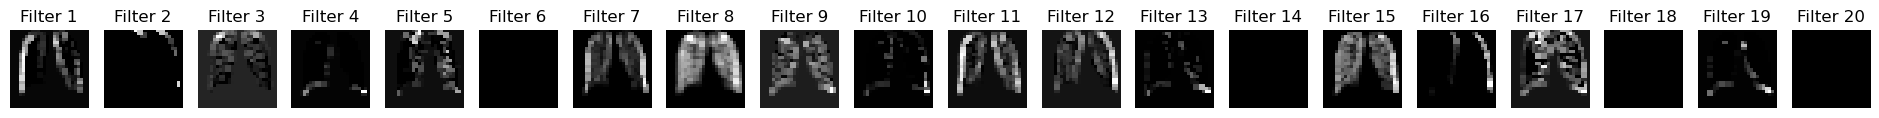

conv2d_120
1/1 [==============================] - 0s 31ms/step


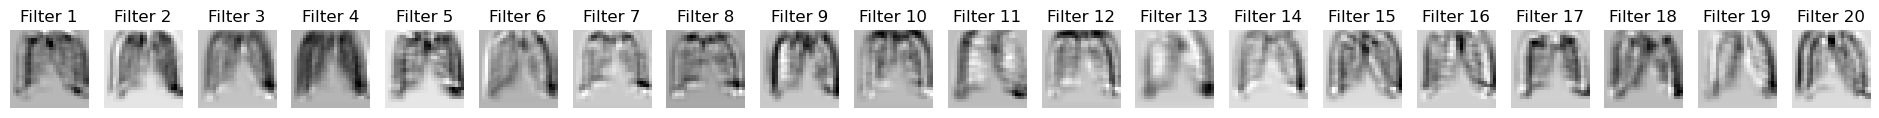

activation_10
1/1 [==============================] - 0s 29ms/step


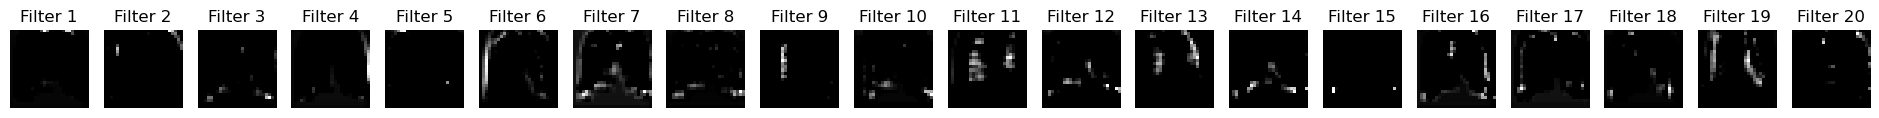

max_pooling2d_99
1/1 [==============================] - 0s 32ms/step


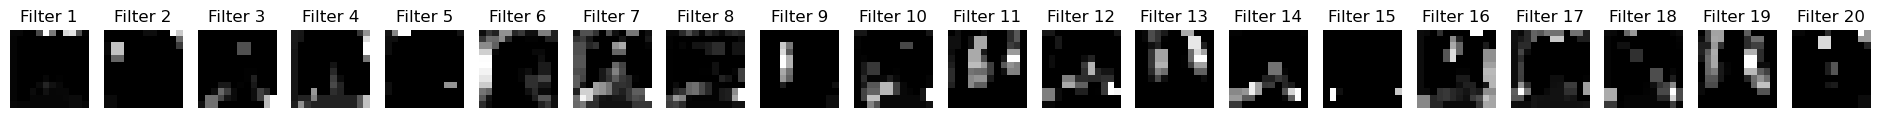

batch_normalization_27
1/1 [==============================] - 0s 33ms/step


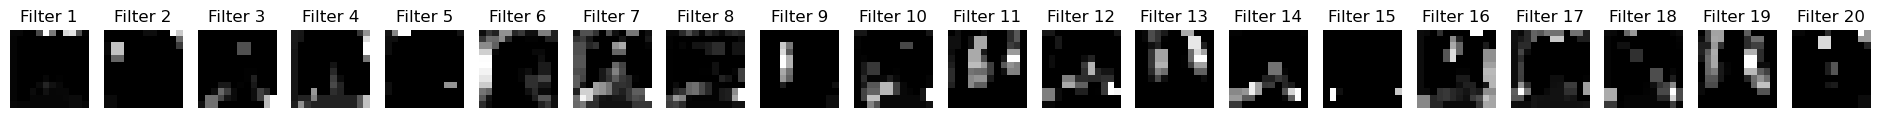

conv2d_121
1/1 [==============================] - 0s 41ms/step


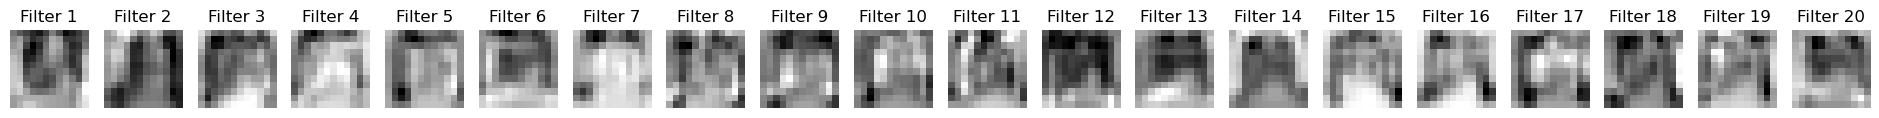

activation_11
1/1 [==============================] - 0s 47ms/step


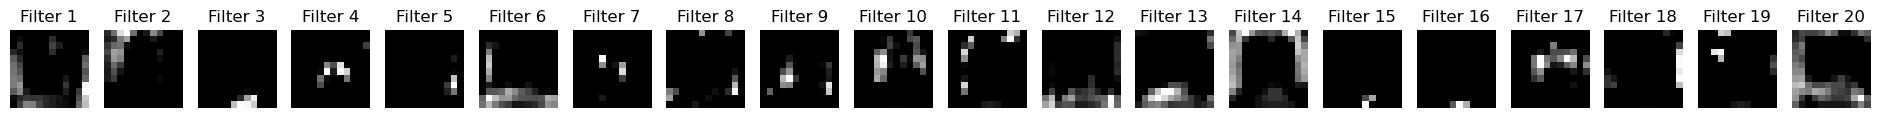

batch_normalization_28
1/1 [==============================] - 0s 41ms/step


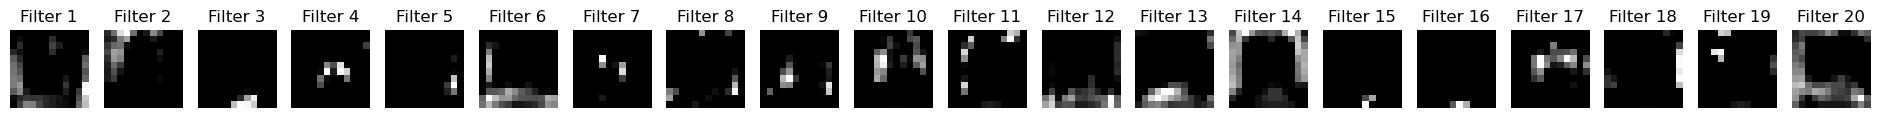

conv2d_122
1/1 [==============================] - 0s 44ms/step


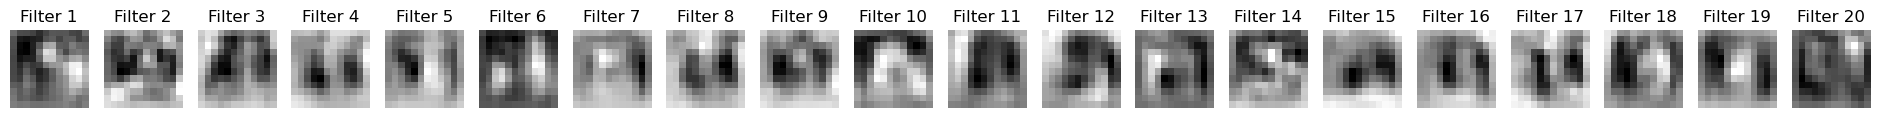

activation_12
1/1 [==============================] - 0s 44ms/step


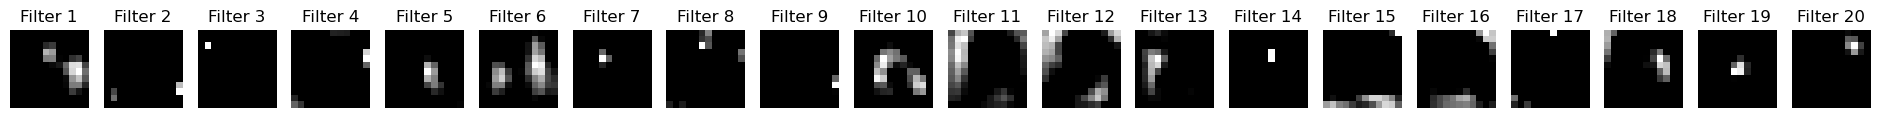

batch_normalization_29
1/1 [==============================] - 0s 48ms/step


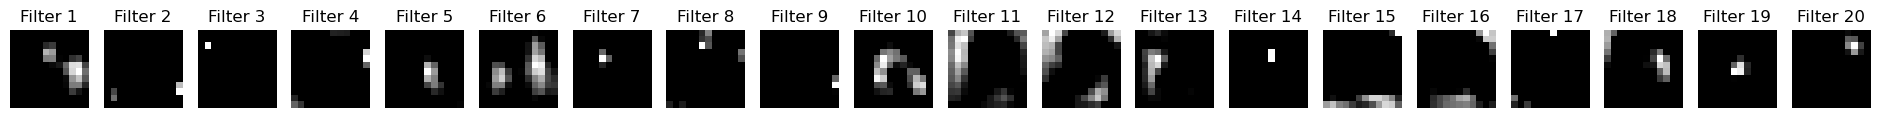

conv2d_123
1/1 [==============================] - 0s 54ms/step


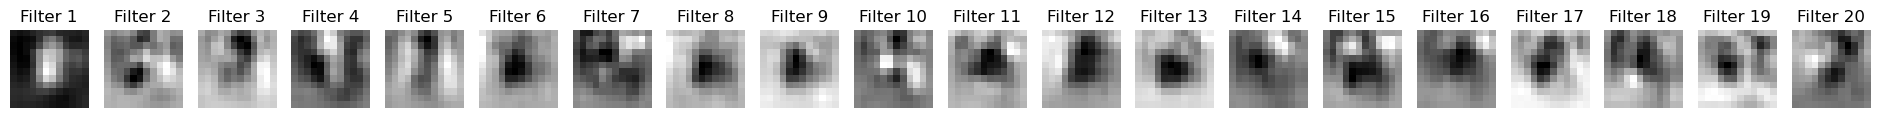

activation_13
1/1 [==============================] - 0s 54ms/step


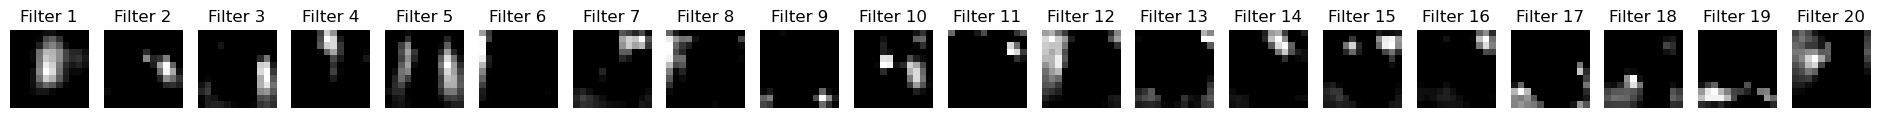

max_pooling2d_100
1/1 [==============================] - 0s 54ms/step


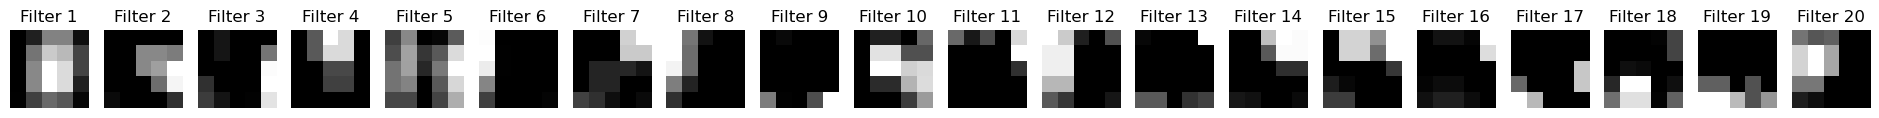

batch_normalization_30
1/1 [==============================] - 0s 54ms/step


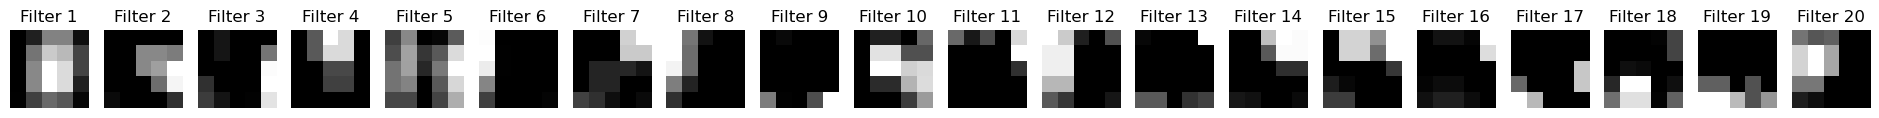

In [103]:
plot_layers(model)

# References <a id="29"></a>

The original assigniment had more steps and was finished in group, I just took the parts in wich i worked on as base and improved 

The original work credits:

**2023F-T3 AISC2007 - Deep Learning 01**
<hr>

**CASE STUDY Week 6-" Predict Covid-19 based on lungs X-Ray**
<hr>
 
Teacher : **Bhavik Gandhi**
<hr>

**Group E**
<hr>

>Fabio Duarte Junior <br>
>Janit Jindal <br>
>Megha Ann Mathew  <br>
>Megha Malhotra  <br>
>Naman Goyal   <br>
>Neel Dharmendra Patel  <br>
>Sandesh Pandey  <br>

October 2023, Loyalist College in toronto, Term 3, AI and data science post-graduation course.
North York GTA, Ontario, campus Victoria Park

I also used perplexity AI and Chat-GPT as co-pilot for the Alexnet implementation and fix errors during the coding.